# **Machine learning model for prediction of smartphone addiction**

# **Import Statements**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# **read The Dataset**

In [99]:
# read The csv file
df = pd.read_csv("cleaneddata.csv")

In [100]:
# Show The First Five Row
df.head()

,Timestamp,Full Name :,Gender :,Do you use your phone to click pictures of class notes?,Do you buy books/access books from your mobile?,Does your phone's battery last a day?,"When your phone's battery dies out, do you run for the charger?",Do you worry about losing your cell phone?,Do you take your phone to the bathroom?,Do you use your phone in any social gathering (parties)?,Do you often check your phone without any notification?,Do you check your phone just before going to sleep/just after waking up?,Do you keep your phone right next to you while sleeping?,"Do you check emails, missed calls, texts during class time?",Do you find yourself relying on your phone when things get awkward?,Are you on your phone while watching TV or eating food?,Do you have a panic attack if you leave your phone elsewhere?,You don't mind responding to messages or checking your phone while on date?,For how long do you use your phone for playing games?,Can you live a day without phone ?,whether you are addicted to phone?
0,2023/02/24 4:34:02 PM GMT+5:30,Dev,MALE,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,>2 hours,No,Yes
1,2023/02/27 3:32:22 PM GMT+5:30,A.RuthvikDev,MALE,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,<2 hours,Yes,No
2,2023/02/27 3:33:44 PM GMT+5:30,Vishnu,MALE,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,NaN,No,No,No,No,No,<2 hours,Yes,No
3,2023/02/27 3:37:46 PM GMT+5:30,Sathvik,MALE,No,No,No,Yes,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,<2 hours,Yes,No
4,2023/02/27 3:49:52 PM GMT+5:30,K Ruthvekh,MALE,No,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,<2 hours,Yes,No


In [101]:
# Show The Last Five Row
df.tail()

,Timestamp,Full Name :,Gender :,Do you use your phone to click pictures of class notes?,Do you buy books/access books from your mobile?,Does your phone's battery last a day?,"When your phone's battery dies out, do you run for the charger?",Do you worry about losing your cell phone?,Do you take your phone to the bathroom?,Do you use your phone in any social gathering (parties)?,Do you often check your phone without any notification?,Do you check your phone just before going to sleep/just after waking up?,Do you keep your phone right next to you while sleeping?,"Do you check emails, missed calls, texts during class time?",Do you find yourself relying on your phone when things get awkward?,Are you on your phone while watching TV or eating food?,Do you have a panic attack if you leave your phone elsewhere?,You don't mind responding to messages or checking your phone while on date?,For how long do you use your phone for playing games?,Can you live a day without phone ?,whether you are addicted to phone?
1431,2023/03/28 2:39:59 PM GMT+5:142,Puri jaganath,MALE,Yes,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,No,Yes,>2 hours,Yes,No
1432,2023/03/10 3:31:53 PM GMT+5:143,mahesh,MALE,Yes,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,No,Yes,>2 hours,Yes,No
1433,2023/03/28 2:39:19 PM GMT+5:143,Sheri mohan,MALE,Yes,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,No,Yes,>2 hours,Yes,No
1434,2023/03/28 2:39:59 PM GMT+5:143,Puri jaganath,MALE,Yes,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,No,Yes,>2 hours,Yes,No
1435,2023/03/10 3:31:25 PM GMT+5:31,praneeth,MALE,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,>2 hours,Yes,Yes


# **Informationn about Dataset**

In [102]:
# check The Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 21 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Timestamp                                                                     1436 non-null   object
 1   Full Name :                                                                   1431 non-null   object
 2   Gender :                                                                      1435 non-null   object
 3   Do you use your phone to click pictures of class notes?                       1434 non-null   object
 4   Do you buy books/access books from your mobile?                               1434 non-null   object
 5   Does your phone's battery last a day?                                         1433 non-null   object
 6   When your phone's battery dies out, do y

In [103]:
# shape of The Dataset
df.shape

(1436, 21)

In [104]:
# Check The Null Values
df.isnull().sum()

Timestamp                                                                        0
Full Name :                                                                      5
Gender :                                                                         1
Do you use your phone to click pictures of class notes?                          2
Do you buy books/access books from your mobile?                                  2
Does your phone's battery last a day?                                            3
When your phone's battery dies out, do you run for the charger?                  3
Do you worry about losing your cell phone?                                       1
Do you take your phone to the bathroom?                                          2
Do you use your phone in any social gathering (parties)?                         1
Do you often check your phone without any notification?                          1
Do you check your phone just before going to sleep/just after waking up?        16
Do y

In [105]:

# Check The Duplicate Vlue
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [106]:
# Describe The Dataset
df.describe()

,Timestamp,Full Name :,Gender :,Do you use your phone to click pictures of class notes?,Do you buy books/access books from your mobile?,Does your phone's battery last a day?,"When your phone's battery dies out, do you run for the charger?",Do you worry about losing your cell phone?,Do you take your phone to the bathroom?,Do you use your phone in any social gathering (parties)?,Do you often check your phone without any notification?,Do you check your phone just before going to sleep/just after waking up?,Do you keep your phone right next to you while sleeping?,"Do you check emails, missed calls, texts during class time?",Do you find yourself relying on your phone when things get awkward?,Are you on your phone while watching TV or eating food?,Do you have a panic attack if you leave your phone elsewhere?,You don't mind responding to messages or checking your phone while on date?,For how long do you use your phone for playing games?,Can you live a day without phone ?,whether you are addicted to phone?
count,1436,1431,1435,1434,1434,1433,1433,1435,1434,1435,1435,1420,1419,1433,1432,1435,1435,1418,1432,1435,1435
unique,1229,269,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,2023/03/10 3:31:24 PM GMT+5:30,mahesh,MALE,Yes,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,No,Yes,>2 hours,Yes,No
freq,63,160,1252,1227,889,1113,1074,779,922,763,783,789,766,946,1051,766,749,1076,887,1158,848


In [107]:
# total null valus in Dataset
df.isnull().sum().sum()

87

In [108]:
df.columns

Index(['Timestamp', 'Full Name :', 'Gender :',
       'Do you use your phone to click pictures of class notes?',
       'Do you buy books/access books from your mobile?',
       'Does your phone's battery last a day?',
       'When your phone's battery dies out, do you run for the charger?',
       'Do you worry about losing your cell phone?',
       'Do you take your phone to the bathroom?',
       'Do you use your phone in any social gathering (parties)?',
       'Do you often check your phone without any notification? ',
       'Do you check your phone just before going to sleep/just after waking up?',
       'Do you keep your phone right next to you while sleeping?',
       'Do you check emails, missed calls, texts during class time? ',
       'Do you find yourself relying on your phone when things get awkward?',
       'Are you on your phone while watching TV or eating food?',
       'Do you have a panic attack if you leave your phone elsewhere?',
       'You don't mind responding

In [109]:
df['whether you are addicted to phone?'].value_counts()

whether you are addicted to phone?
No     848
Yes    587
Name: count, dtype: int64

# **Preprocessing**

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 21 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Timestamp                                                                     1436 non-null   object
 1   Full Name :                                                                   1431 non-null   object
 2   Gender :                                                                      1435 non-null   object
 3   Do you use your phone to click pictures of class notes?                       1434 non-null   object
 4   Do you buy books/access books from your mobile?                               1434 non-null   object
 5   Does your phone's battery last a day?                                         1433 non-null   object
 6   When your phone's battery dies out, do y

In [111]:
# **fill a Null Values**
col = df[['Timestamp', 'Full Name :', 'Gender :',
       'Do you use your phone to click pictures of class notes?',
       'Do you buy books/access books from your mobile?',
       "Does your phone's battery last a day?",
       "When your phone's battery dies out, do you run for the charger?",
       'Do you worry about losing your cell phone?',
       'Do you take your phone to the bathroom?',
       'Do you use your phone in any social gathering (parties)?',
       'Do you often check your phone without any notification? ',
       'Do you check your phone just before going to sleep/just after waking up?',
       'Do you keep your phone right next to you while sleeping?',
       'Do you check emails, missed calls, texts during class time? ',
       'Do you find yourself relying on your phone when things get awkward?',
       'Are you on your phone while watching TV or eating food?',
       'Do you have a panic attack if you leave your phone elsewhere?',
       "You don't mind responding to messages or checking your phone while on date? ",
       'For how long do you use your phone for playing games?',
       'Can you live a day without phone ? ',
       'whether you are addicted to phone?']]

In [112]:
# filling a null Values applying a ffill method
for i in col:
    df[i].fillna(method='ffill',inplace=True)

C:\Users\pavan\AppData\Local\Temp\ipykernel_16476\32333529.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(method='ffill',inplace=True)
C:\Users\pavan\AppData\Local\Temp\ipykernel_16476\32333529.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[i].fillna(method='ffill',inplace=True)


In [113]:
df['Can you live a day without phone ? '].fillna(method='bfill',inplace=True)
df['whether you are addicted to phone?'].fillna(method='bfill',inplace=True)

C:\Users\pavan\AppData\Local\Temp\ipykernel_16476\3450501767.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Can you live a day without phone ? '].fillna(method='bfill',inplace=True)
C:\Users\pavan\AppData\Local\Temp\ipykernel_16476\3450501767.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['whether you are addicted to phone?'].fillna(method='bfill',inplace=True)


In [114]:
df.isnull().sum()

Timestamp                                                                       0
Full Name :                                                                     0
Gender :                                                                        0
Do you use your phone to click pictures of class notes?                         0
Do you buy books/access books from your mobile?                                 0
Does your phone's battery last a day?                                           0
When your phone's battery dies out, do you run for the charger?                 0
Do you worry about losing your cell phone?                                      0
Do you take your phone to the bathroom?                                         0
Do you use your phone in any social gathering (parties)?                        0
Do you often check your phone without any notification?                         0
Do you check your phone just before going to sleep/just after waking up?        0
Do you keep your

In [115]:
# before Label Encoding
df.head()

,Timestamp,Full Name :,Gender :,Do you use your phone to click pictures of class notes?,Do you buy books/access books from your mobile?,Does your phone's battery last a day?,"When your phone's battery dies out, do you run for the charger?",Do you worry about losing your cell phone?,Do you take your phone to the bathroom?,Do you use your phone in any social gathering (parties)?,Do you often check your phone without any notification?,Do you check your phone just before going to sleep/just after waking up?,Do you keep your phone right next to you while sleeping?,"Do you check emails, missed calls, texts during class time?",Do you find yourself relying on your phone when things get awkward?,Are you on your phone while watching TV or eating food?,Do you have a panic attack if you leave your phone elsewhere?,You don't mind responding to messages or checking your phone while on date?,For how long do you use your phone for playing games?,Can you live a day without phone ?,whether you are addicted to phone?
0,2023/02/24 4:34:02 PM GMT+5:30,Dev,MALE,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,>2 hours,No,Yes
1,2023/02/27 3:32:22 PM GMT+5:30,A.RuthvikDev,MALE,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,<2 hours,Yes,No
2,2023/02/27 3:33:44 PM GMT+5:30,Vishnu,MALE,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,No,<2 hours,Yes,No
3,2023/02/27 3:37:46 PM GMT+5:30,Sathvik,MALE,No,No,No,Yes,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,<2 hours,Yes,No
4,2023/02/27 3:49:52 PM GMT+5:30,K Ruthvekh,MALE,No,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,<2 hours,Yes,No


In [116]:
# Apply The Label Encoding
le = LabelEncoder()

In [117]:
for i in col:
    df[i]=le.fit_transform(df[i])

In [118]:
# After Label Encoding
df.head()

,Timestamp,Full Name :,Gender :,Do you use your phone to click pictures of class notes?,Do you buy books/access books from your mobile?,Does your phone's battery last a day?,"When your phone's battery dies out, do you run for the charger?",Do you worry about losing your cell phone?,Do you take your phone to the bathroom?,Do you use your phone in any social gathering (parties)?,Do you often check your phone without any notification?,Do you check your phone just before going to sleep/just after waking up?,Do you keep your phone right next to you while sleeping?,"Do you check emails, missed calls, texts during class time?",Do you find yourself relying on your phone when things get awkward?,Are you on your phone while watching TV or eating food?,Do you have a panic attack if you leave your phone elsewhere?,You don't mind responding to messages or checking your phone while on date?,For how long do you use your phone for playing games?,Can you live a day without phone ?,whether you are addicted to phone?
0,0,45,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1
1,9,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,0
2,10,248,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0
3,11,185,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
4,12,69,1,0,0,1,0,0,1,1,1,1,1,1,1,1,0,1,0,1,0


In [119]:
df['whether you are addicted to phone?'].value_counts()

whether you are addicted to phone?
0    848
1    588
Name: count, dtype: int64

# **EDA**

C:\Users\pavan\AppData\Local\Temp\ipykernel_16476\2907715040.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


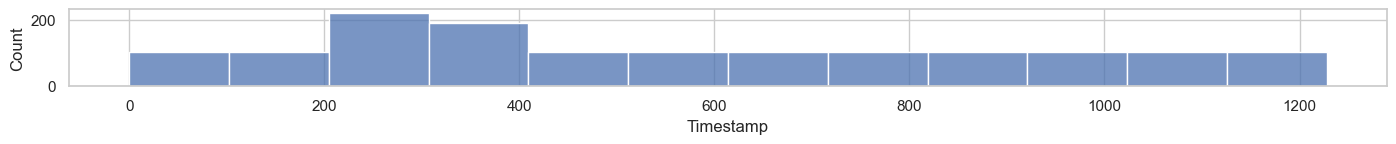

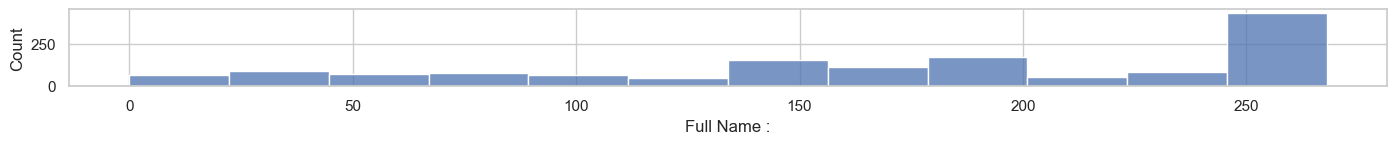

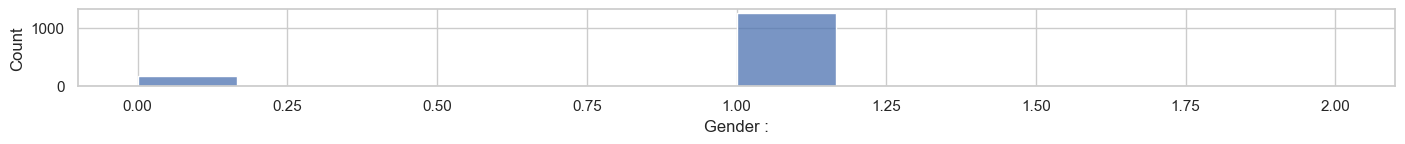

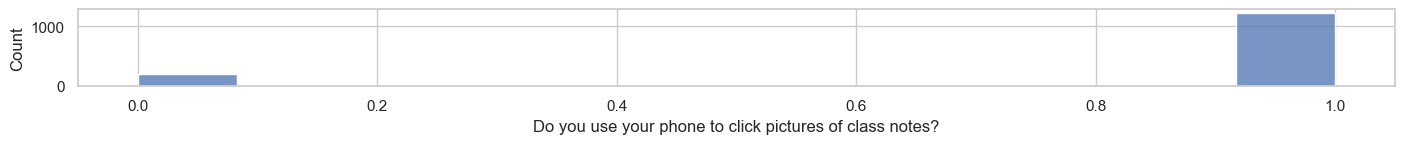

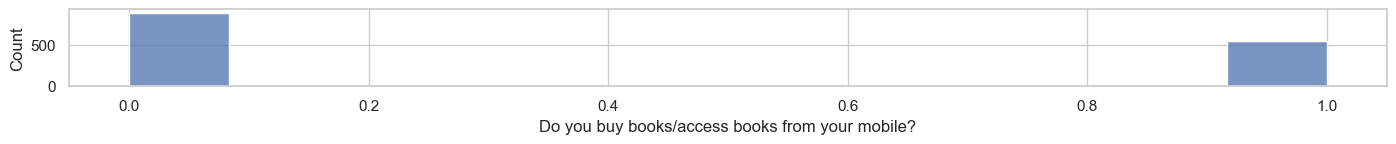

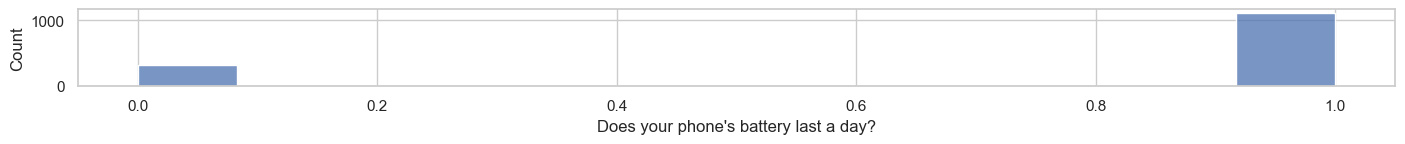

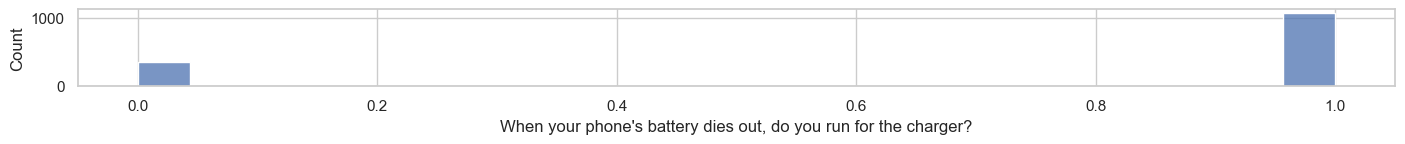

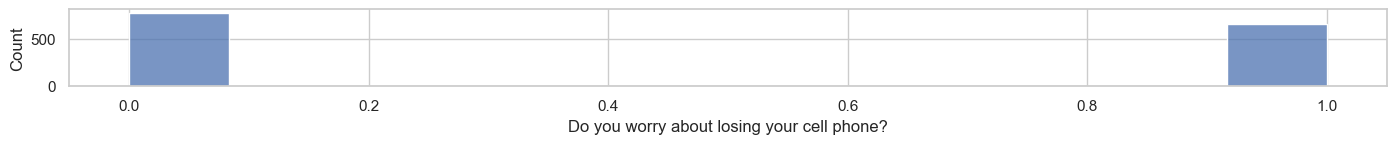

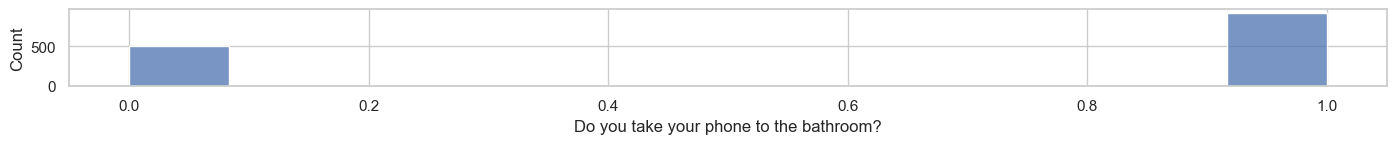

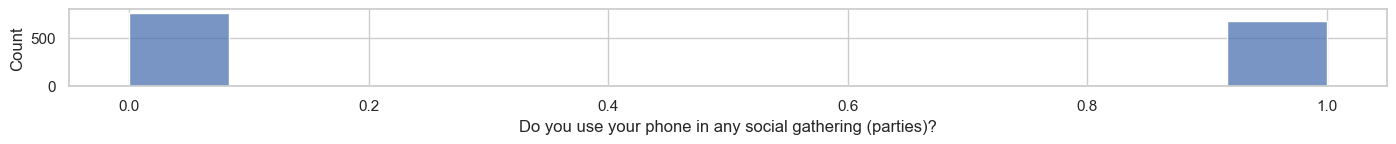

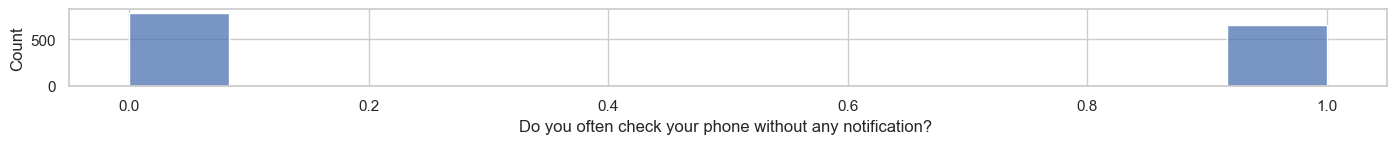

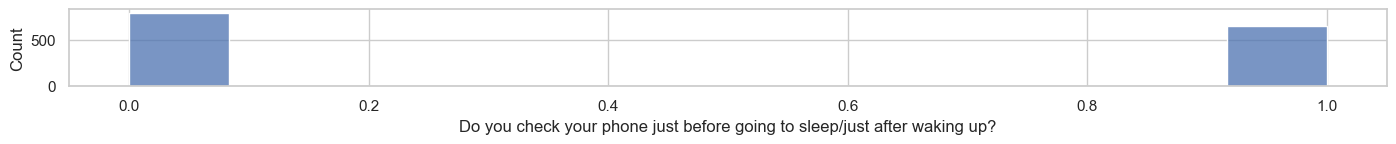

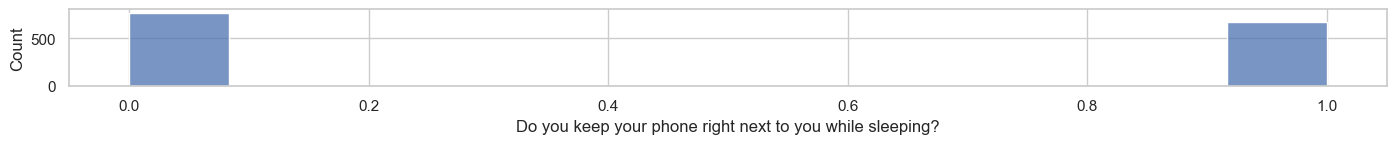

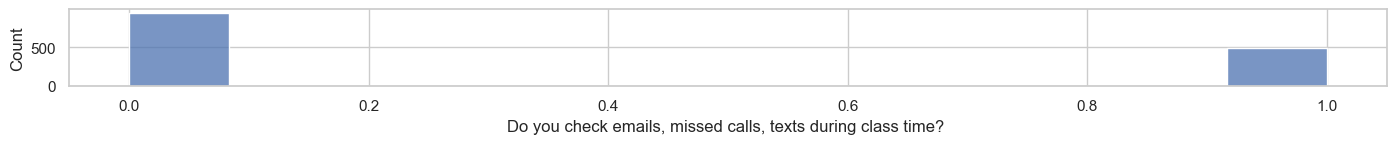

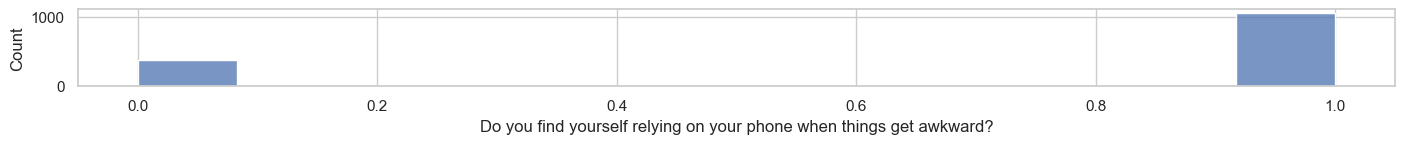

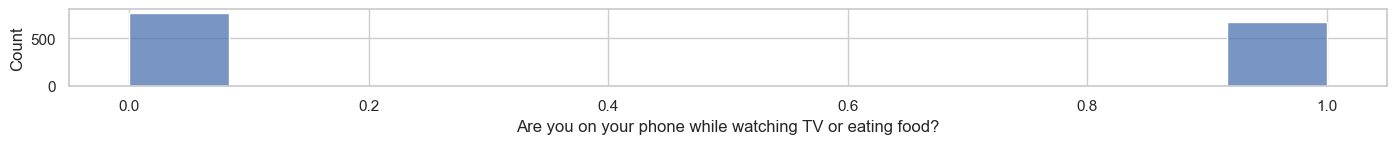

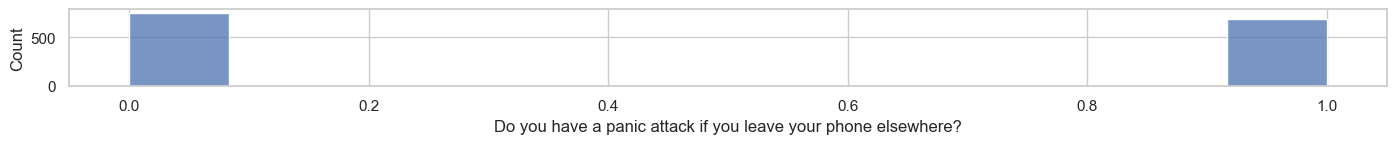

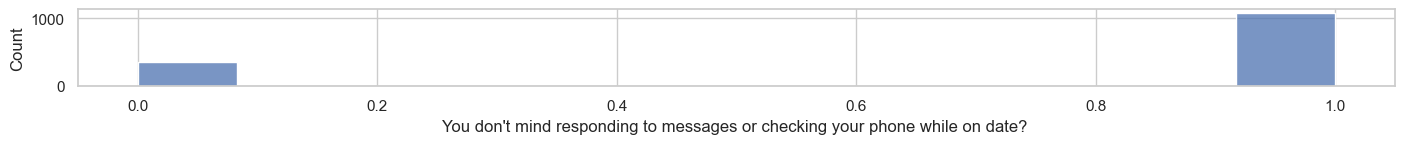

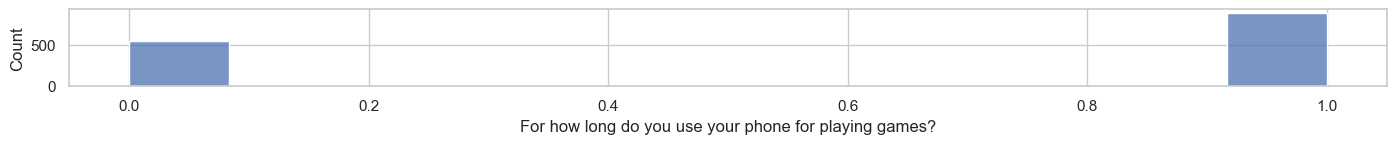

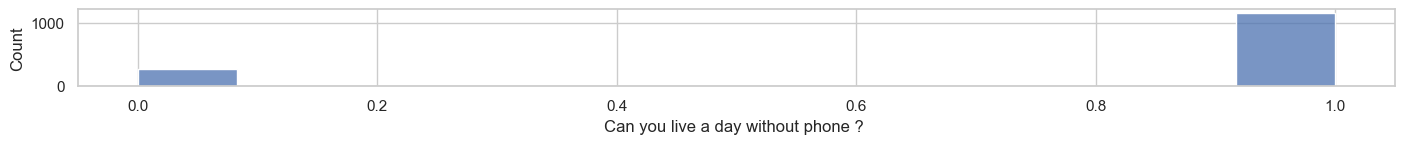

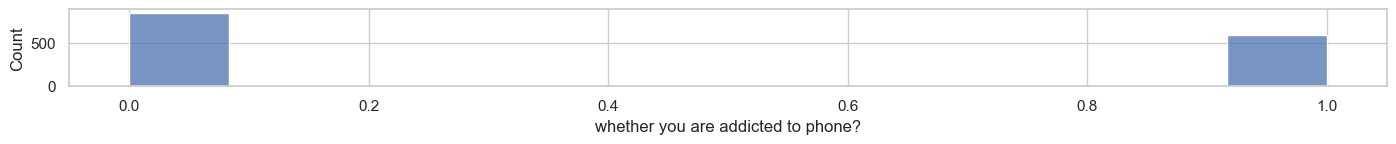

In [120]:
# Histplot of every column in dataset
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.histplot(data=df1, x=column)
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_16476\1802899625.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


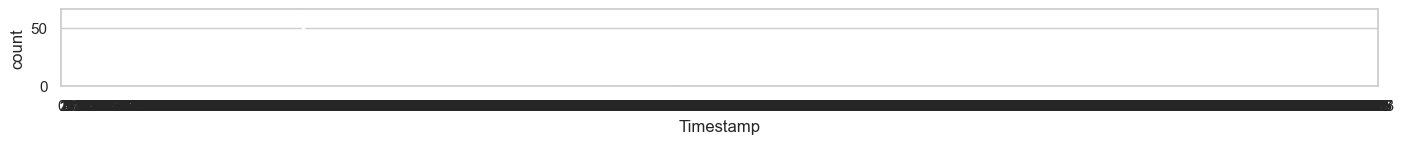

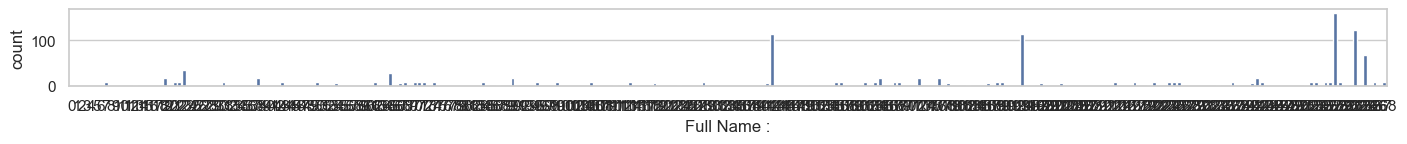

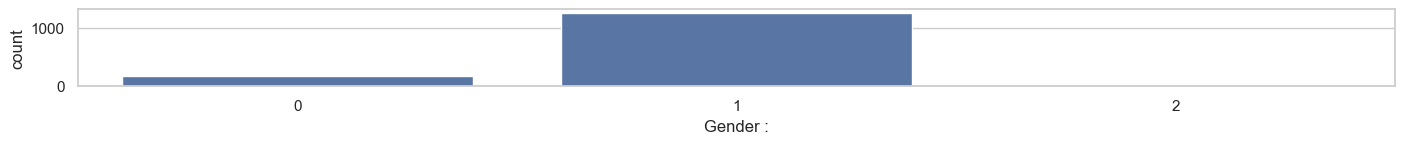

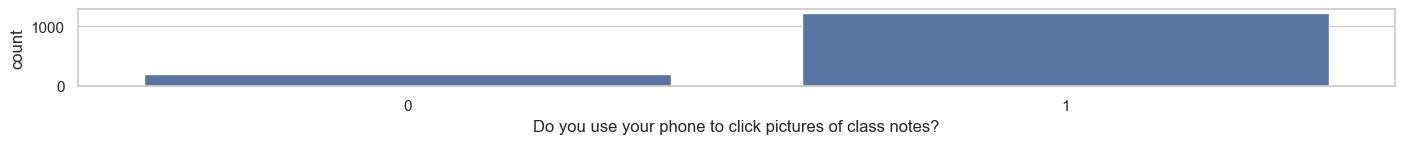

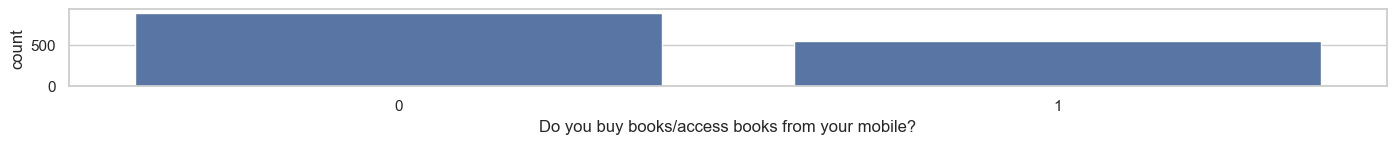

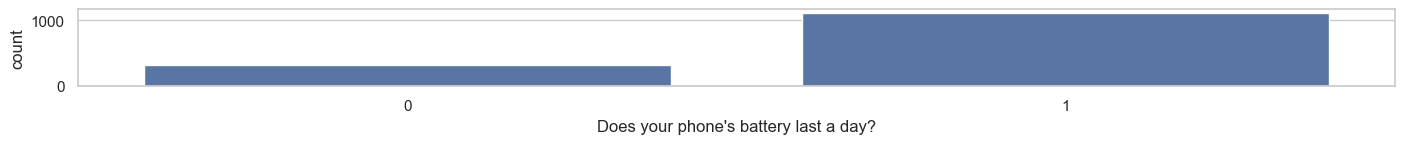

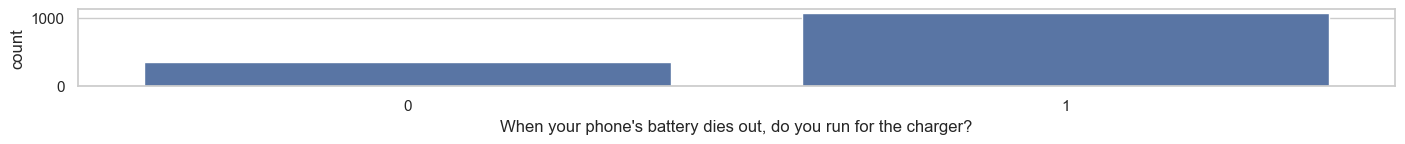

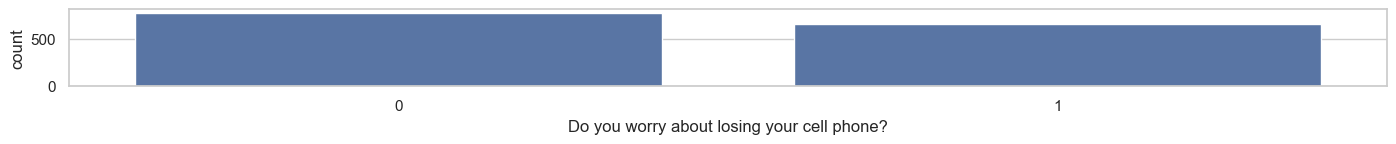

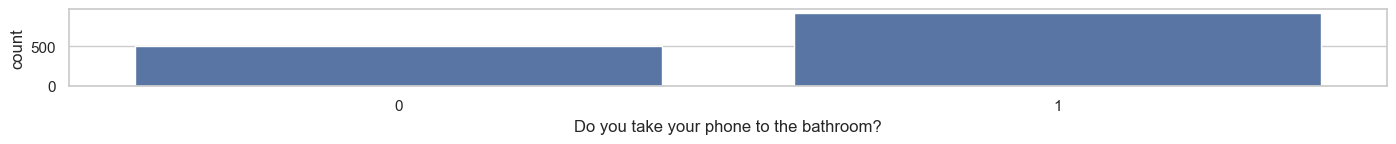

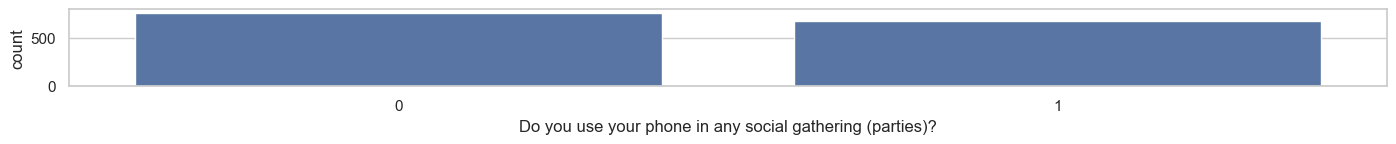

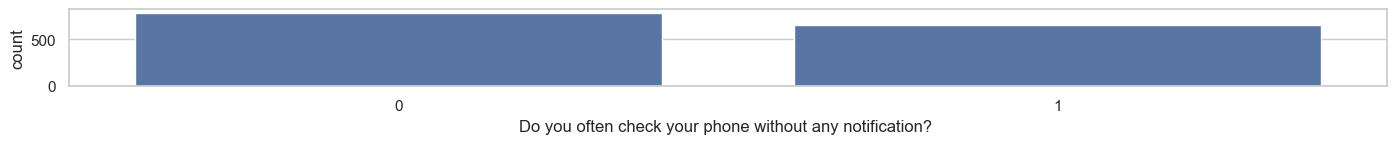

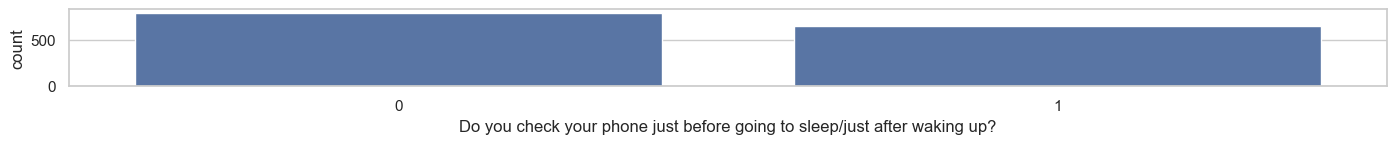

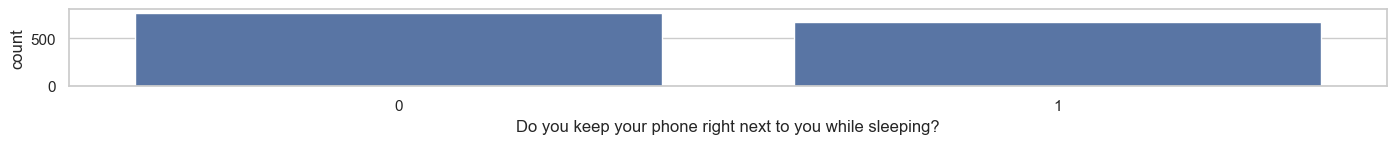

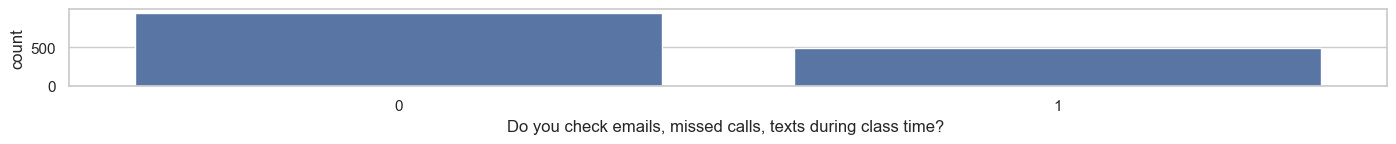

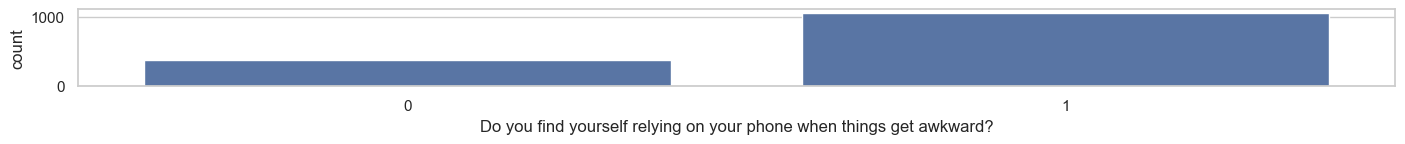

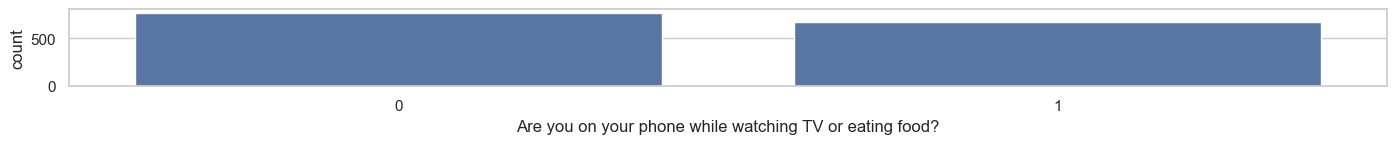

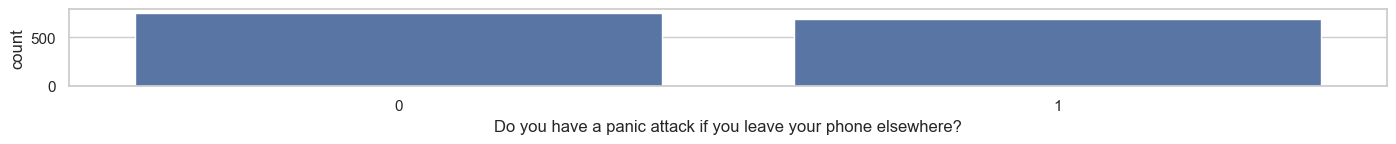

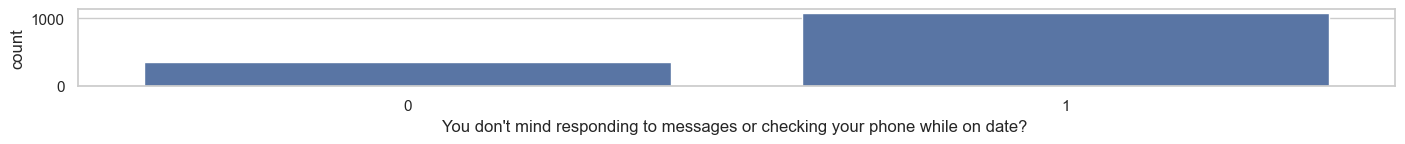

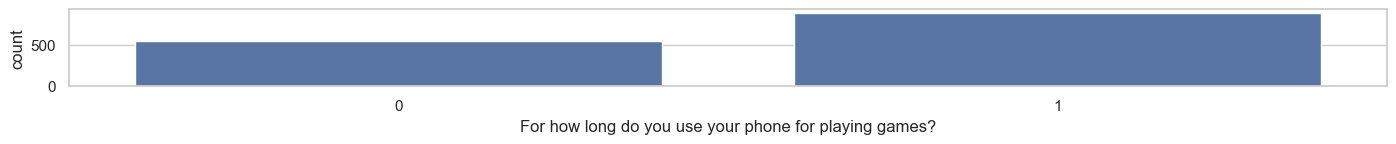

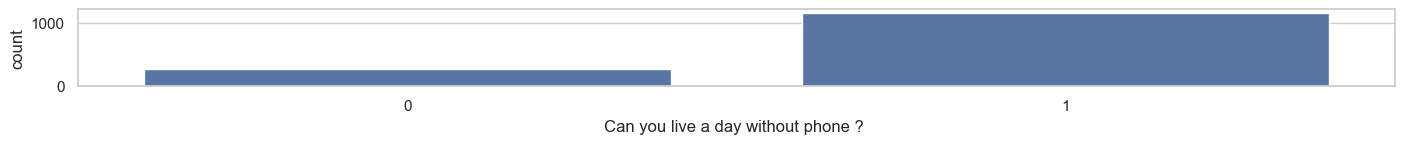

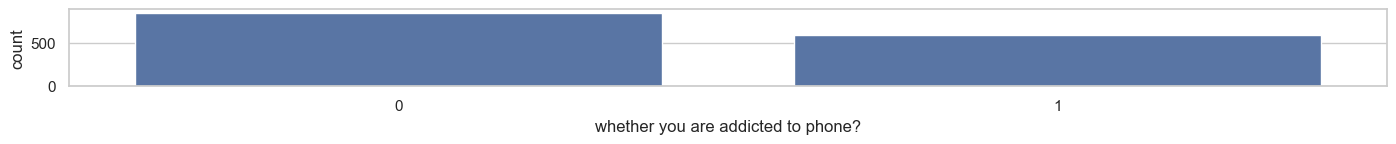

In [121]:
# countplot of every column in dataset
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.countplot(data=df1, x=column)
plt.show()

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 21 columns):
 #   Column                                                                        Non-Null Count  Dtype
---  ------                                                                        --------------  -----
 0   Timestamp                                                                     1436 non-null   int32
 1   Full Name :                                                                   1436 non-null   int32
 2   Gender :                                                                      1436 non-null   int32
 3   Do you use your phone to click pictures of class notes?                       1436 non-null   int32
 4   Do you buy books/access books from your mobile?                               1436 non-null   int32
 5   Does your phone's battery last a day?                                         1436 non-null   int32
 6   When your phone's battery dies out, do you run f

<Axes: ylabel='whether you are addicted to phone?'>

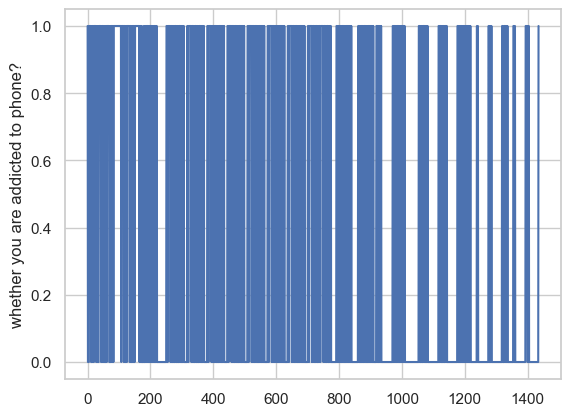

In [123]:
# Target column lineplot
sns.lineplot(df["whether you are addicted to phone?"])


<Axes: xlabel='whether you are addicted to phone?', ylabel='Count'>

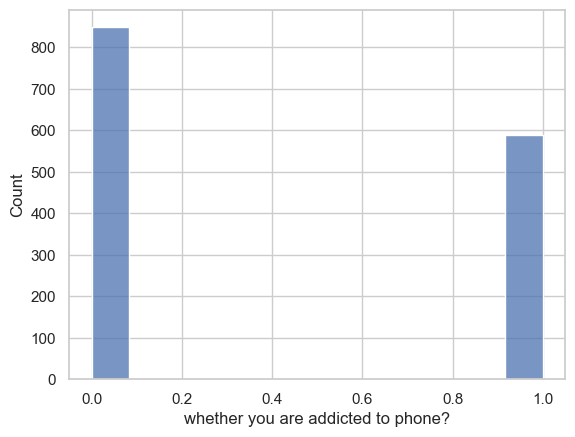

In [124]:
# Target column lineplot
sns.histplot(df["whether you are addicted to phone?"])

<Axes: xlabel='whether you are addicted to phone?', ylabel='Density'>

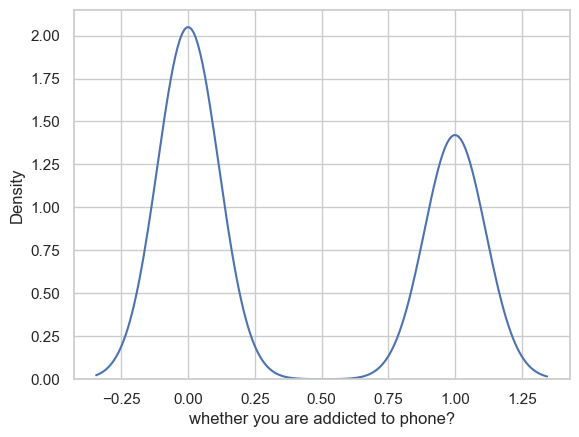

In [125]:
# target column kdeplot
sns.kdeplot(df["whether you are addicted to phone?"])

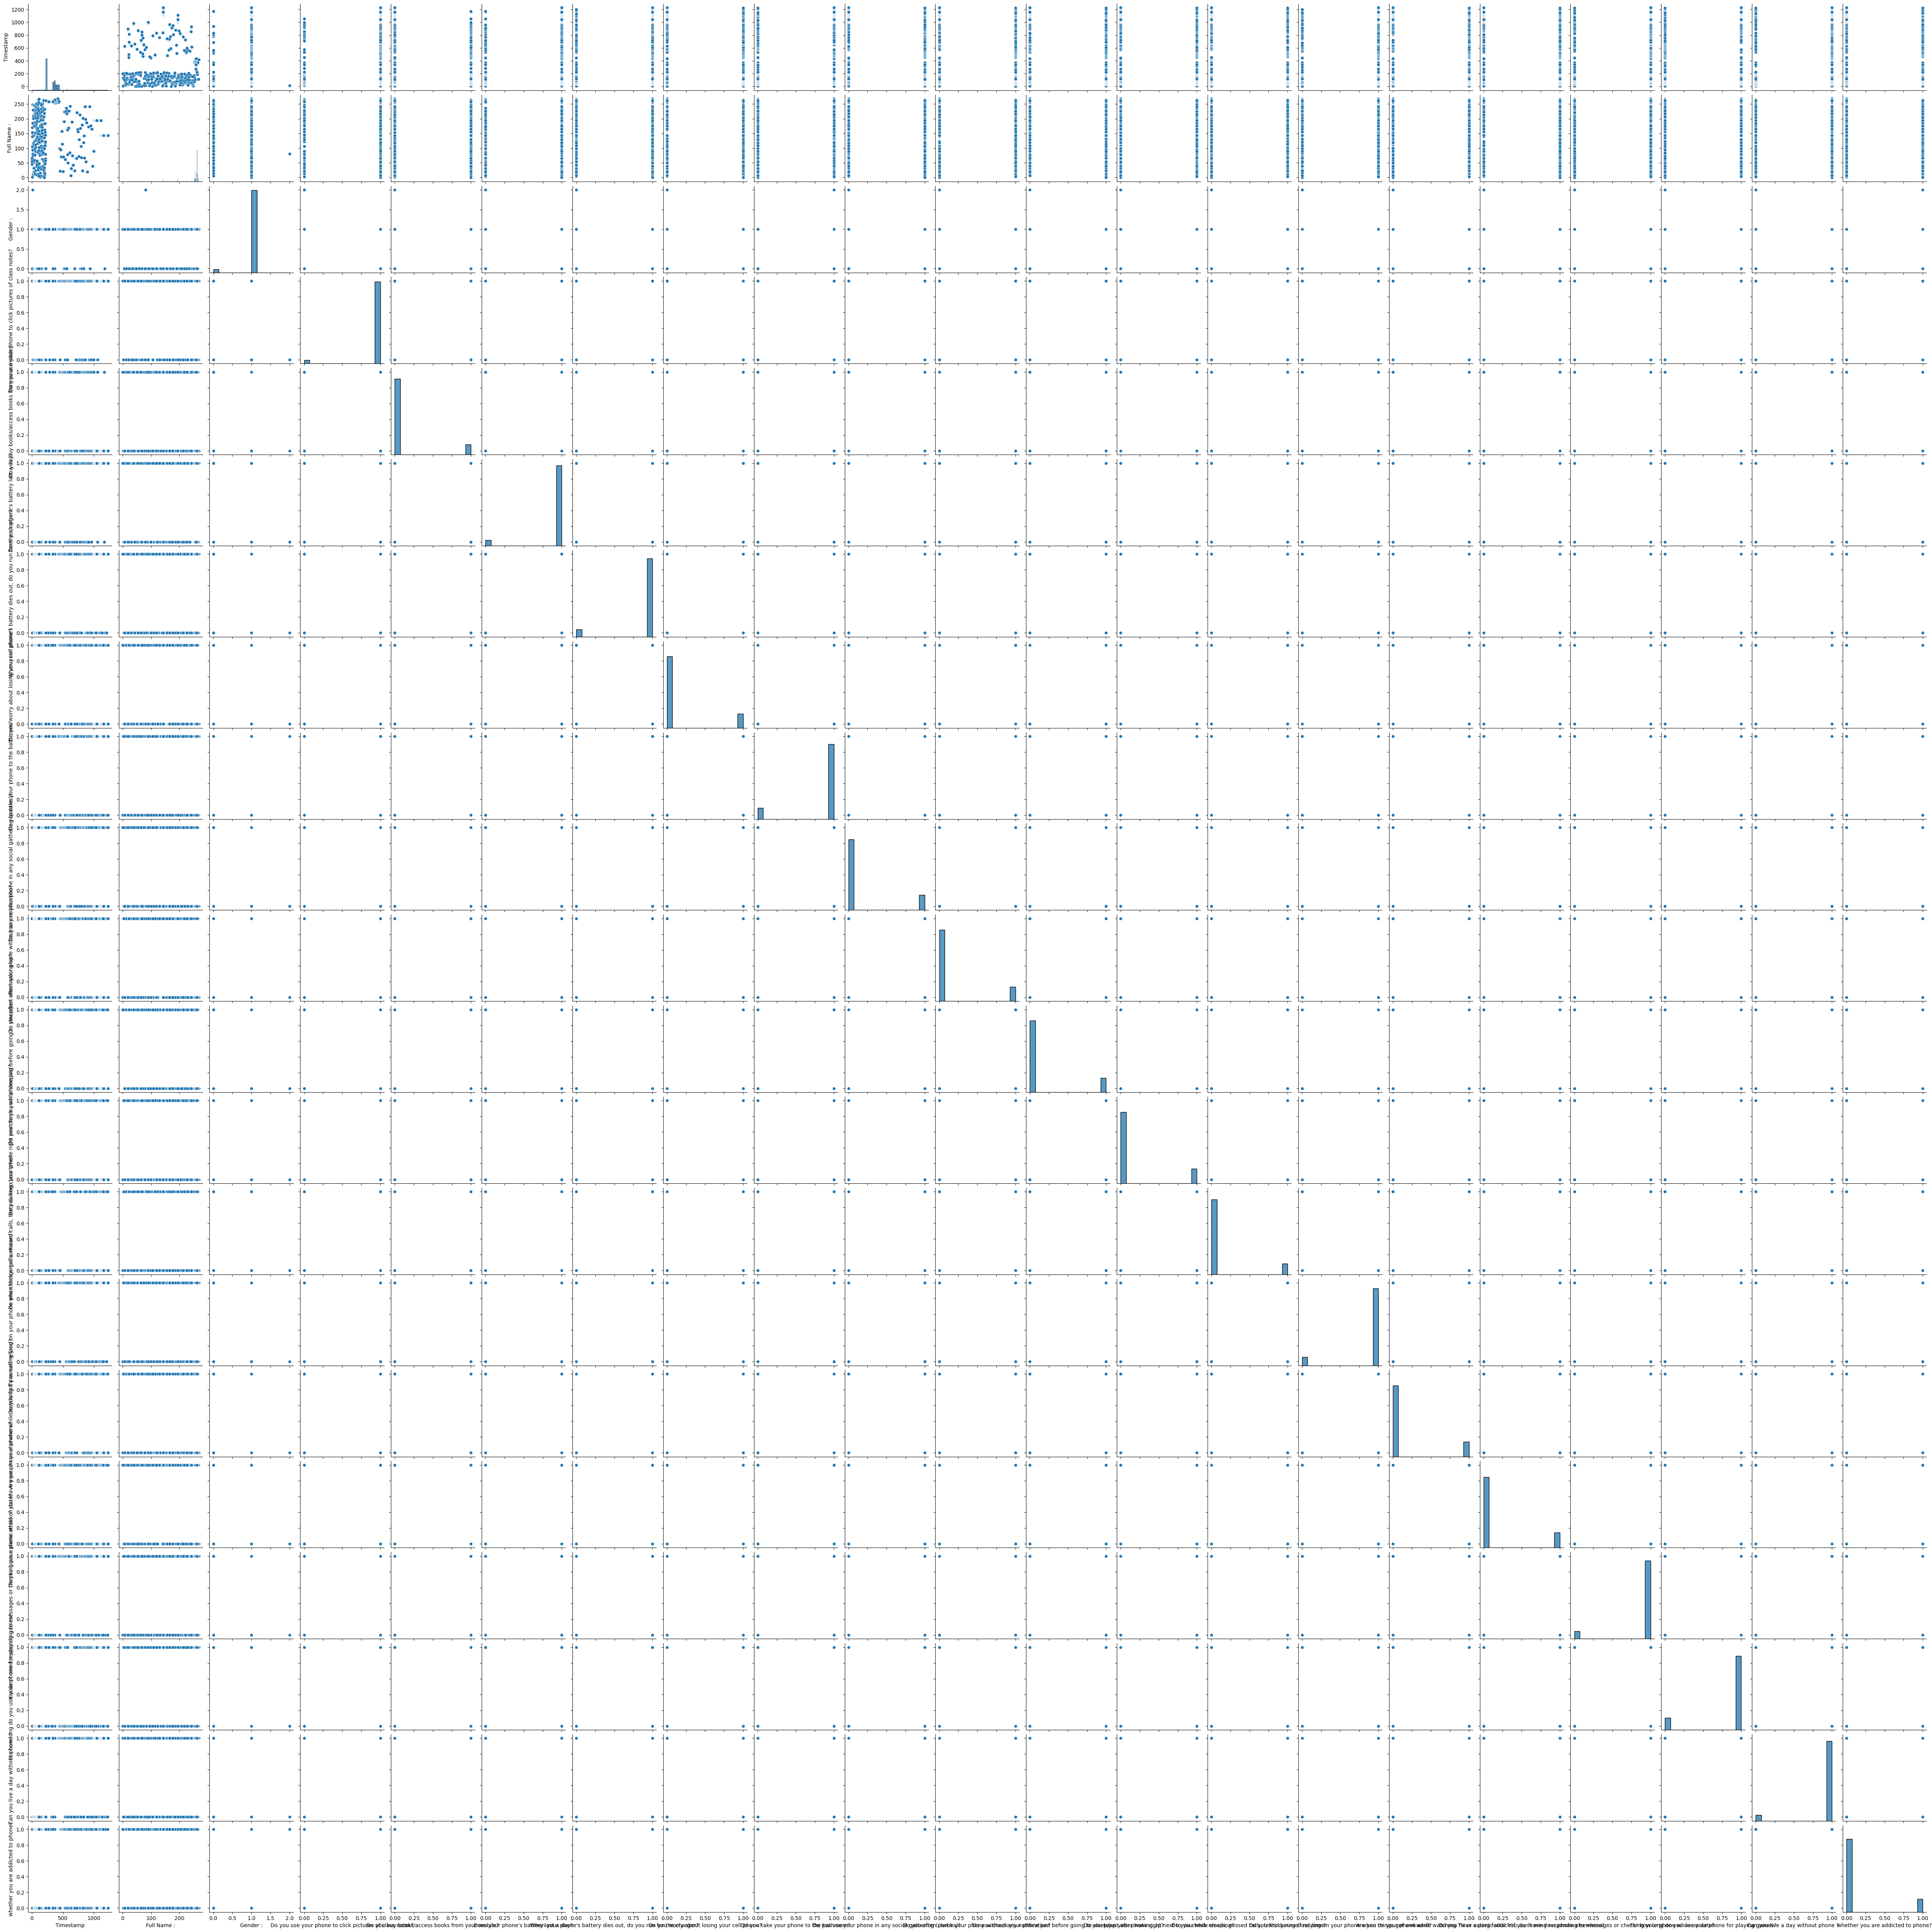

In [116]:
# pairplot of every column in dataset
sns.pairplot(df)

# **Split The Data**

In [126]:
# Delete The unknown column
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('[^A-Za-z0-9_]', '', regex=True)

In [127]:

x = df.drop(columns=['whether_you_are_addicted_to_phone','Timestamp','Full_Name_','Do_you_use_your_phone_to_click_pictures_of_class_notes',
       'Do_you_buy_booksaccess_books_from_your_mobile','Do_you_keep_your_phone_right_next_to_you_while_sleeping',])
y = df['whether_you_are_addicted_to_phone']

In [128]:
Oversample = RandomOverSampler(random_state=72)
x_sm, y_sm = Oversample.fit_resample(x[:700],y[:700])

In [129]:
from collections import Counter
print(Counter(y_sm))

Counter({1: 375, 0: 375})


In [130]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state= 72)

In [131]:
x_train.shape

(600, 15)

In [132]:
x_test.shape

(150, 15)

In [133]:
y_train.shape

(600,)

In [134]:
y_test.shape

(150,)

# **Module Train**

## **RandomForestClasifier**

In [137]:
from sklearn.ensemble import RandomForestClassifier
re = RandomForestClassifier()
re.fit(x_train,y_train)
re_pred = re.predict(x_test)
ac = accuracy_score(y_test,re_pred)
ac

0.9333333333333333

In [140]:
print(f"\n{'='*40}")
print(f"Classification Report for RandomForestClassifier")
print(f"{'='*40}\n")
print(classification_report(y_test, re_pred))


Classification Report for RandomForestClassifier

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        84
           1       0.90      0.95      0.93        66

    accuracy                           0.93       150
   macro avg       0.93      0.94      0.93       150
weighted avg       0.94      0.93      0.93       150



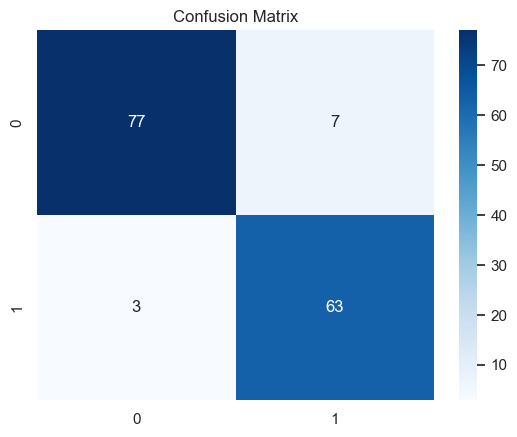

In [138]:
cm = confusion_matrix(y_test, re_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from sklearn.metrics import precision_score
p = precision_score(y_test, re_pred,average='macro')
p

0.9314921090387374

In [49]:
from sklearn.metrics import f1_score
f = f1_score(y_test, re_pred, average='macro')
f

0.9325660852364683

In [50]:
from sklearn.metrics import recall_score
r = recall_score(y_test, re_pred, average='macro')
r

0.933982683982684

## **DecisionTreeClasifier**

In [51]:
from sklearn.tree import DecisionTreeClassifier
de = DecisionTreeClassifier()
de.fit(x_train,y_train)
de_pred = de.predict(x_test)
ac1 = accuracy_score(y_test,de_pred)
ac1

0.9066666666666666

In [141]:
print(f"\n{'='*40}")
print(f"Classification Report for DecisionTreeClasifier")
print(f"{'='*40}\n")
print(classification_report(y_test, de_pred))


Classification Report for DecisionTreeClasifier

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        84
           1       0.88      0.91      0.90        66

    accuracy                           0.91       150
   macro avg       0.90      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



In [52]:
from sklearn.metrics import precision_score

p1 = precision_score(y_test, de_pred,average='macro')
p1

0.9045911047345767

In [53]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, de_pred, average='macro')
f1

0.9055925193310556

In [54]:
from sklearn.metrics import recall_score
r1 = recall_score(y_test, de_pred, average='macro')
r1

0.9069264069264069

# **Logistic Regression**

In [55]:
from sklearn.linear_model import LogisticRegression
le = LogisticRegression()
le.fit(x_train,y_train)
le_pred = le.predict(x_test)
ac2 = accuracy_score(y_test,le_pred)
ac2

0.8133333333333334

In [142]:
print(f"\n{'='*40}")
print(f"Classification Report for LogisticRegression")
print(f"{'='*40}\n")
print(classification_report(y_test, le_pred))


Classification Report for LogisticRegression

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        84
           1       0.77      0.82      0.79        66

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.82      0.81      0.81       150



In [58]:
from sklearn.metrics import precision_score

p2 = precision_score(y_test, le_pred,average='macro')
p2

0.8107142857142857

In [59]:
from sklearn.metrics import f1_score
f2 = f1_score(y_test, le_pred, average='macro')
f2

0.8116929698708751

In [60]:
from sklearn.metrics import recall_score
r2 = recall_score(y_test, le_pred, average='macro')
r2

0.8138528138528138

# **Support Vector Classifier**

In [61]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
ac3 = accuracy_score(y_test,sv_pred)
ac3

0.92

In [143]:
print(f"\n{'='*40}")
print(f"Classification Report for Support Vector Classifier")
print(f"{'='*40}\n")
print(classification_report(y_test, sv_pred))


Classification Report for Support Vector Classifier

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        84
           1       0.89      0.94      0.91        66

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



In [62]:
from sklearn.metrics import precision_score

p3 = precision_score(y_test, sv_pred,average='macro')
p3

0.9178571428571428

In [63]:
from sklearn.metrics import f1_score
f3 = f1_score(y_test, sv_pred, average='macro')
f3

0.919296987087518

In [64]:
from sklearn.metrics import recall_score
r3 = recall_score(y_test, sv_pred, average='macro')
r3

0.922077922077922



# **Naive Bayes**


In [65]:
from sklearn.naive_bayes import GaussianNB
ge = GaussianNB()
ge.fit(x_train,y_train)
ge_pred = ge.predict(x_test)
ac4 = accuracy_score(y_test,ge_pred)
ac4

0.8333333333333334

In [144]:
print(f"\n{'='*40}")
print(f"Classification Report for Naive Bayes")
print(f"{'='*40}\n")
print(classification_report(y_test, ge_pred))


Classification Report for Naive Bayes

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        84
           1       0.79      0.85      0.82        66

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.84      0.83      0.83       150



In [66]:
from sklearn.metrics import precision_score

p4 = precision_score(y_test, ge_pred,average='macro')
p4

0.8310750579425923

In [67]:
from sklearn.metrics import f1_score
f4 = f1_score(y_test, ge_pred, average='macro')
f4

0.832072007523174

In [68]:
from sklearn.metrics import recall_score
r4 = recall_score(y_test, ge_pred, average='macro')
r4

0.8349567099567099

# **KNN**

In [69]:
from sklearn.neighbors import KNeighborsClassifier

kne = KNeighborsClassifier()
kne.fit(x_train,y_train)
kne_pred = kne.predict(x_test)
ac5 = accuracy_score(y_test,kne_pred)
ac5

0.9066666666666666

In [145]:
print(f"\n{'='*40}")
print(f"Classification Report for KNeighborsClassifier")
print(f"{'='*40}\n")
print(classification_report(y_test, kne_pred))


Classification Report for KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        84
           1       0.86      0.94      0.90        66

    accuracy                           0.91       150
   macro avg       0.90      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



In [70]:
from sklearn.metrics import precision_score

p5 = precision_score(y_test, kne_pred,average='macro')
p5

0.9049145299145299

In [71]:
from sklearn.metrics import f1_score
f5 = f1_score(y_test, kne_pred, average='macro')
f5

0.9060654857756307

In [72]:
from sklearn.metrics import recall_score
r5 = recall_score(y_test, kne_pred, average='macro')
r5

0.9101731601731602

# **GradiantBoosting**

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
ac6 = accuracy_score(y_test,gbc_pred)
ac6

0.9266666666666666

In [146]:
print(f"\n{'='*40}")
print(f"Classification Report for GradientBoostingClassifier")
print(f"{'='*40}\n")
print(classification_report(y_test, gbc_pred))


Classification Report for GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        84
           1       0.90      0.94      0.92        66

    accuracy                           0.93       150
   macro avg       0.92      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



In [74]:
from sklearn.metrics import precision_score

p6 = precision_score(y_test, gbc_pred,average='macro')
p6

0.9245840042941492

In [75]:
from sklearn.metrics import f1_score
f6 = f1_score(y_test, gbc_pred, average='macro')
f6

0.9259259259259259

In [76]:
from sklearn.metrics import recall_score
r6 = recall_score(y_test, gbc_pred, average='macro')
r6

0.928030303030303

# **ADABOOST**

In [77]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_pred = ada.predict(x_test)
ac7 = accuracy_score(y_test,ada_pred)
ac7

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8266666666666667

In [147]:
print(f"\n{'='*40}")
print(f"Classification Report for AdaBoostClassifier")
print(f"{'='*40}\n")
print(classification_report(y_test, ada_pred))


Classification Report for AdaBoostClassifier

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        84
           1       0.79      0.82      0.81        66

    accuracy                           0.83       150
   macro avg       0.82      0.83      0.82       150
weighted avg       0.83      0.83      0.83       150



In [78]:
from sklearn.metrics import precision_score

p7 = precision_score(y_test, ada_pred,average='macro')
p7

0.8238880918220947

In [79]:
from sklearn.metrics import f1_score
f7 = f1_score(y_test, ada_pred, average='macro')
f7

0.8246718216148174

In [80]:
from sklearn.metrics import recall_score
r7 = recall_score(y_test, ada_pred, average='macro')
r7

0.8257575757575758

# **Accuracy graph**

In [81]:
graph = pd.DataFrame({'Modules':['RendomForestClasifier','DecisionTreeClassifier','Logistic Regration','SVC','Naive Bayes','KNN','GradiantBoosting','ADABOOST',],
          'Accuracy':[ac*100,ac1*100,ac2*100,ac3*100,ac4*100,ac5*100,ac6*100,ac7*100,],
                      'Precision':[p*100,p1*100,p2*100,p3*100,p4*100,p5*100,p6*100,p7*100],
                     'F1_score':[f*100,f1*100,f2*100,f3*100,f4*100,f5*100,f6*100,f7*100],
                     'Recall':[r*100,r1*100,r2*100,r3*100,r4*100,r5*100,r6*100,r7*100]})

In [82]:
graph.round(2)

,Modules,Accuracy,Precision,F1_score,Recall
0,RendomForestClasifier,93.33,93.15,93.26,93.40
1,DecisionTreeClassifier,90.67,90.46,90.56,90.69
2,Logistic Regration,81.33,81.07,81.17,81.39
3,SVC,92.00,91.79,91.93,92.21
4,Naive Bayes,83.33,83.11,83.21,83.50
5,KNN,90.67,90.49,90.61,91.02
6,GradiantBoosting,92.67,92.46,92.59,92.80
7,ADABOOST,82.67,82.39,82.47,82.58


C:\Users\pavan\AppData\Local\Temp\ipykernel_16476\3442824715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


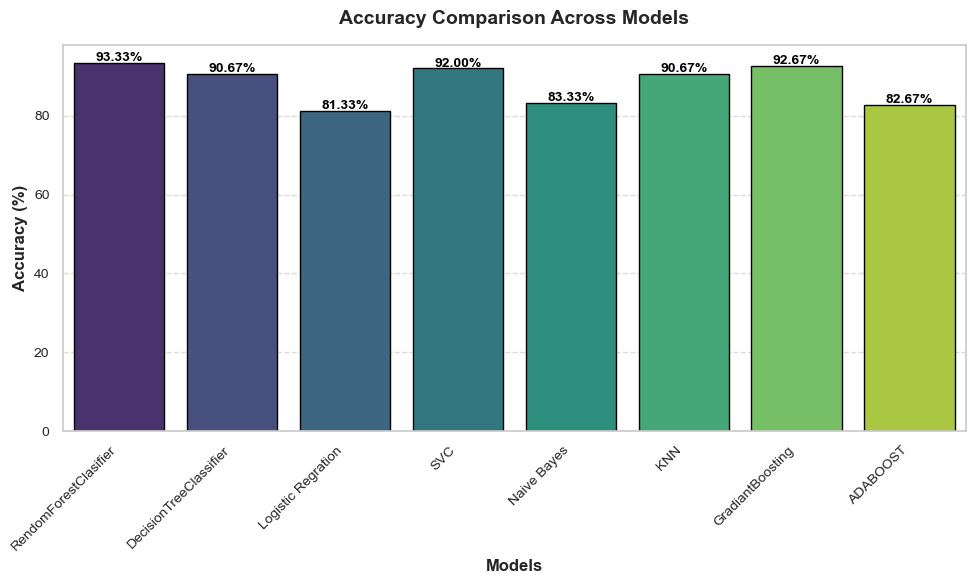

In [83]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Enhanced barplot
ax = sns.barplot(
    x=graph["Modules"], 
    y=graph["Accuracy"], 
    palette="viridis",
    edgecolor="black"
)

# Add annotations on bars
for i, value in enumerate(graph["Accuracy"]):
    ax.text(i, value + 0.5, f"{value:.2f}%", ha="center", fontsize=10, color="black", weight="bold")

# Customize plot appearance
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Models", fontsize=12, weight="bold")
plt.ylabel("Accuracy (%)", fontsize=12, weight="bold")
plt.title("Accuracy Comparison Across Models", fontsize=14, weight="bold", pad=15)

# Add gridlines for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [84]:
print("Bestmodel among all models",max(graph.Accuracy))

Bestmodel among all models 93.33333333333333


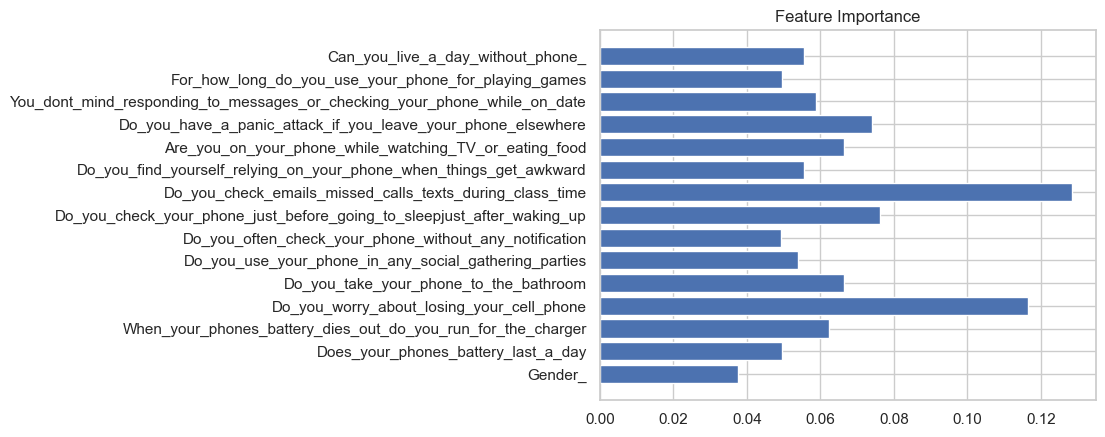

In [85]:
importances = re.feature_importances_
plt.barh(x.columns, importances)
plt.title('Feature Importance')
plt.show()

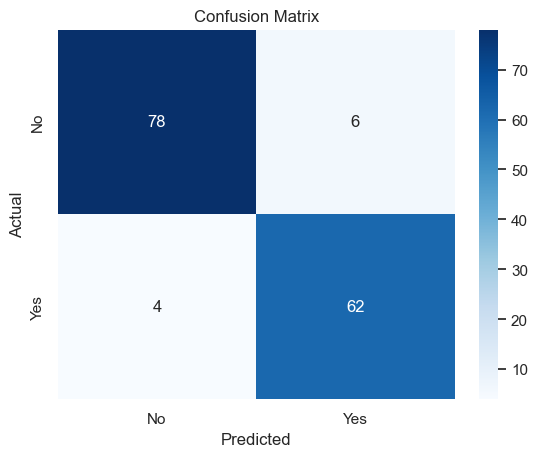

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, re_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72, stratify=y)

# Random Forest with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=72)
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1])

In [88]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=72)
scores = cross_val_score(model, x, y, cv=skf, scoring='f1')

print("F1 Scores from Cross-Validation:", scores)
print("Mean F1 Score:", scores.mean())


F1 Scores from Cross-Validation: [0.95833333 0.94871795 0.92622951 0.95319149 0.96551724]
Mean F1 Score: 0.9503979041978031


In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier is the best model


best_model = RandomForestClassifier()
best_model.fit(X_train, y_train) #fit the model


# Save the model to a pickle file
filename = 'best_modeel.pkl'
pickle.dump(best_model, open(filename, 'wb'))
